In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
class Value:
  def __init__(self, data, _children=(), _op='', label='') -> None:
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label
    self.grad = 0.0

  def __repr__(self) -> str:
    return f"Value(data={self.data})"

  def __add__(self, other):
    return Value(self.data + other.data, (self, other), '+')

  def __mul__(self, other):
    return Value(self.data * other.data, (self, other), '*')

In [68]:
a = Value(6.0); a.label = 'a'
b = Value(2.0); b.label = 'b'
c = Value(9.0); c.label = 'c'
d = Value(5.0); d.label = 'd'
e = Value(12.0); e.label = 'e'

l  = (a+b); l.label = 'l'
y = c * l; y.label = 'y'
print(y)
print(y._prev)
print(y._op)
print(y.label)

Value(data=72.0)
{Value(data=8.0), Value(data=9.0)}
*
y


In [69]:
from graphviz import Digraph

def trace(root):
  # Builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()

  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)

  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = Left to Right

  # Get nodes and edges in a set starting from the root
  nodes, edges = trace(root)

  for n in nodes:
    uid = str(id(n))

    # For any value in the graph, create a rectangular node for it
    dot.node(name = uid, label = "{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')

    # Though not mandatory, we can add the operator to make the graph more intuitive
    if n._op:
      # if value is a result of some operation, create a new node for operation for it
      dot.node(name = uid + n._op, label=n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  # Connect nodes via edges
  for n1, n2 in edges:
    # dot.edge(str(id(n1)), str(id(n2))) # Use this if you dont want the operator
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot



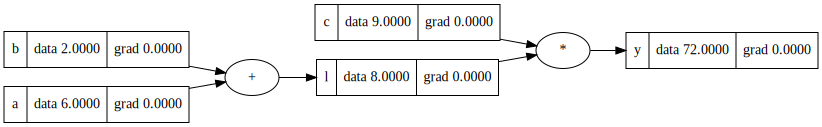

In [70]:
# Visualise the forward pass
draw_dot(y)